## Análise inicial dos dados

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
caminho_dados = r'/home/emyle/projeto_icd/dados/dados_totais.csv'
dataset = pd.read_csv(caminho_dados,  encoding="utf-8")

In [35]:
dataset

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,7.819839e+08
1,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,2.688272e+08
2,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,1.491228e+08
3,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,8.225389e+07
4,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,8.944698e+06
...,...,...,...,...,...,...,...
30204,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,1.101957e+07
30205,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,1.415646e+08
30206,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,2.747358e+09
30207,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,2.747358e+09


In [37]:
# Criando uma copia do dataset para não modificar o original
dataset_copia = dataset.copy()

## Fase 1 

In [38]:
# Descrição estatística dos dados
dataset_copia.describe()

,Ano,População,Valor
count,30209.000000,3.020900e+04,3.020900e+04
mean,2021.976067,1.891848e+06,3.755082e+08
std,0.817692,2.528807e+06,2.490792e+09
min,2021.000000,3.062960e+05,-6.492568e+07
25%,2021.000000,5.489520e+05,5.250071e+06
50%,2022.000000,1.031597e+06,2.708876e+07
75%,2023.000000,1.963726e+06,1.441533e+08
max,2023.000000,1.239637e+07,8.657029e+10


Analisando a descrição estatísca, podemos retirar algumas informações sobre os dados:

1- Na coluna 'Ano', temos tres valores 2022, 2023, 2024, que correspondem aos anos que os dados foram retirados
1.1- A mediana é 2022, o que significa que metade dos dados correspondem ao ano de 2022

2- Na coluna 'População', a média é na casa dos milhões, sugerindo que os dados estão em uma escala grande
2.1- O desvio padrão de 2.528.807 sugere uma alta variação, com valores que se espalham amplamente em torno da média.

3- Na coluna 'Valor', a média também é um valor bem alto (na casa de centenas de milhões), o que sugere a alta escala de valores tambem.
3.1- Analisando o valor min e max, notamos a existência de valores negativos nos dados, o que faz sentido, levando em consideração
que a coluna traz informações sobre os pagamentos de contas.

In [13]:
# Vamos visualizar melhor as linhas referentes aos valores negativos da coluna "valor"
df_valores_negativos = dataset_copia[dataset_copia['Valor'] < 0]

df_valores_negativos

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
492,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,-632793.00
535,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,Outras Receitas Patrimoniais,siconfi-cor_OutrasReceitasPatrimoniais,-39174.87
582,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,-596107.00
961,2021,Prefeitura Municipal de Fortaleza - CE,CE,2703391,(-) Transferências obrigatórias da União relat...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,-33604.00
1049,2021,Prefeitura Municipal de Fortaleza - CE,CE,2703391,(-) Transferências obrigatórias da União relat...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,-300000.00
...,...,...,...,...,...,...,...
28430,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,-1629428.92
28455,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,-1927275.69
28456,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,-1994966.02
28481,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,-68776.42


Esses valores negativos podem indicar ajustes contábeis, como devoluções de transferências obrigatórias, correções em receitas e despesas, e situações de déficit orçamentário, onde despesas superam receitas previstas. 

In [39]:
# Visualizando a existência de dados nulos e o tipo de dado em cada coluna
dataset_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30209 entries, 0 to 30208
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ano                     30209 non-null  int64  
 1   Instituição             30209 non-null  object 
 2   UF                      30209 non-null  object 
 3   População               30209 non-null  int64  
 4   Conta                   30209 non-null  object 
 5   Identificador da Conta  30209 non-null  object 
 6   Valor                   30209 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [40]:
# Outras medidas de centralidade:
mediana = dados['Valor'].median()
moda = dados['Valor'].mode()

# Medidas de dispersão
amplitude = dados['Valor'].max() - dados['Valor'].min()
variancia = dados['Valor'].var()
desvio_padrao = dados['Valor'].std()
coeficiente_variacao = dados['Valor'].std() / dados['Valor'].mean()

print("Mediana:", mediana)
print("Moda:", moda)
print("Amplitude:", amplitude)
print("Variância:", variancia)
print("Desvio padrão:", desvio_padrao)
print("Coeficiente de variação:", coeficiente_variacao)


Mediana: 27088756.1
Moda: 0     30677.55
1    100000.00
Name: Valor, dtype: float64
Amplitude: 86635214821.38
Variância: 6.204045494278312e+18
Desvio padrão: 2490792141.9255986
Coeficiente de variação: 6.633123361551976


In [41]:
# Outras medidas para a coluna 'População'
mediana = dados['População'].median()
moda = dados['População'].mode()

# Medidas de dispersão de 'População'
amplitude = dados['População'].max() - dados['População'].min()
variancia = dados['População'].var()
desvio_padrao = dados['População'].std()
coeficiente_variacao = dados['População'].std() / dados['População'].mean()

print("Mediana:", mediana)
print("Moda:", moda)
print("Amplitude:", amplitude)
print("Variância:", variancia)
print("Desvio padrão:", desvio_padrao)
print("Coeficiente de variação:", coeficiente_variacao)


Mediana: 1031597.0
Moda: 0    6775561
Name: População, dtype: int64
Amplitude: 12090076
Variância: 6394864521010.923
Desvio padrão: 2528806.936286541
Coeficiente de variação: 1.336686191404273


## Fase 2

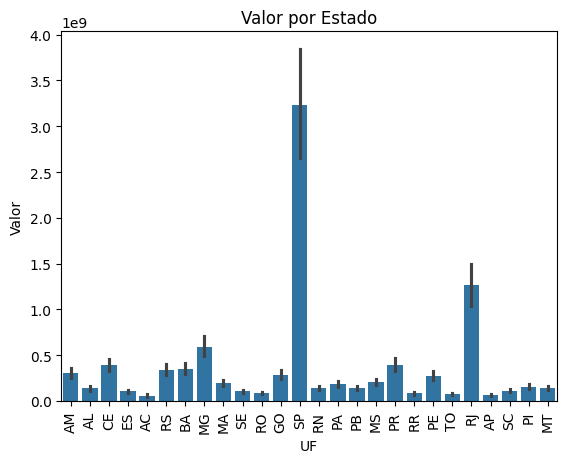

In [42]:
# Grafico de barras que relaciona o valor pago em contas por estado (UF)

sns.barplot(x='UF', y='Valor', data=dataset_copia)
plt.title('Valor por Estado')
plt.xlabel('UF')
plt.ylabel('Valor')
plt.xticks(rotation=90)  
plt.show()


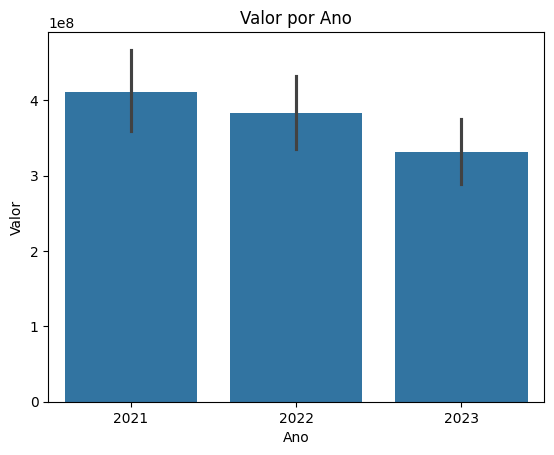

In [44]:
# Grafico que mostra o valor gasto em contas por ano
sns.barplot(x='Ano', y='Valor', data=dados)
plt.title('Valor por Ano')
plt.show()

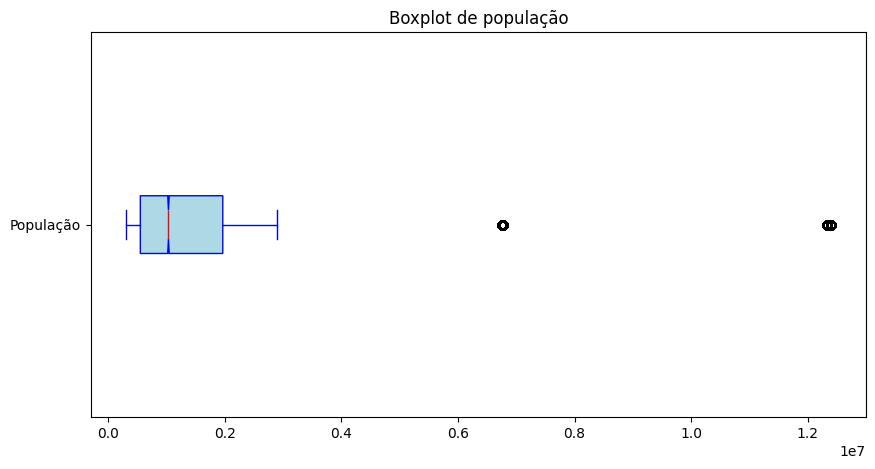

In [46]:
# Criando um boxplot para a coluna População 
plt.figure(figsize=(10, 5))
plt.boxplot(dataset_copia['População'], notch=True, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.yticks([1], ['População'])
plt.title('Boxplot de população')
plt.show()

Outliers encontrados:
0        7.819839e+08
12       4.301373e+08
26       6.862631e+08
27       6.862631e+08
28       6.862631e+08
             ...     
30194    3.909048e+08
30200    7.719368e+08
30206    2.747358e+09
30207    2.747358e+09
30208    2.747358e+09
Name: Valor, Length: 4063, dtype: float64
Quantidade de outliers: 4063


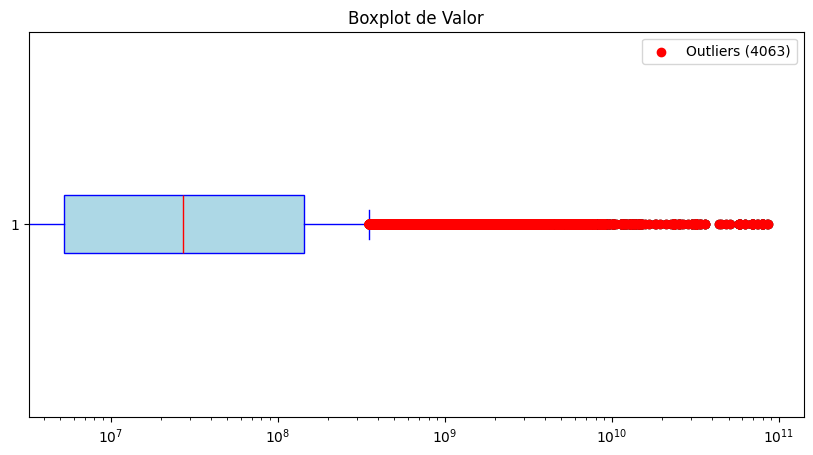

In [47]:

# Calculando Q1 (primeiro quartil) e Q3 (terceiro quartil)
Q1 = np.percentile(dataset_copia['Valor'], 25)
Q3 = np.percentile(dataset_copia['Valor'], 75)

# Calculando o IQR (intervalo interquartil)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = dataset_copia['Valor'][(dataset_copia['Valor'] < limite_inferior) | 
                                  (dataset_copia['Valor'] > limite_superior)]

# Exibindo os outliers
print("Outliers encontrados:")
print(outliers)


# Quantidade de outliers
quantidade_outliers = len(outliers)
print(f"Quantidade de outliers: {quantidade_outliers}")

# Boxplot para a coluna 'Valor'
plt.figure(figsize=(10, 5))
plt.boxplot(dataset_copia['Valor'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            )

# Destacando os outliers com pontos vermelhos
plt.scatter(outliers, np.ones(len(outliers)), color='red', zorder=2, label=f'Outliers ({quantidade_outliers})')

plt.xscale('log')  # Colocando o eixo x em escala logarítmica, pois os valores variam muito
plt.title('Boxplot de Valor')
plt.legend()
plt.show()


In [48]:
# Removendo outliers
dataset_copia = dataset_copia[(dados['Valor'] < dados['Valor'].quantile(0.95))]
dataset_copia = dataset_copia[(dados['População'] < dados['População'].quantile(0.95))]

/tmp/ipykernel_7320/2642422559.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_copia = dataset_copia[(dados['População'] < dados['População'].quantile(0.95))]


### Faremos o mesmo para para um dataset sem os valores negativos da coluna 'valor', para efeitos de comparativo


In [43]:
df_exclui_negativos = dataset_copia[dataset_copia['Valor'] >= 0].copy() #retorna apenas as linhas que contem valores positivos na coluna 'valor'

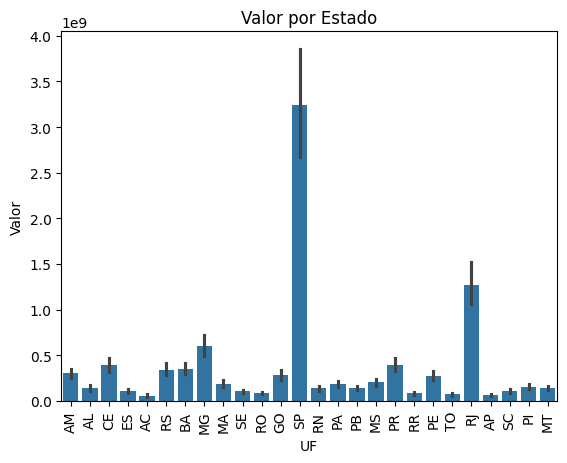

In [16]:
sns.barplot(x='UF', y='Valor', data=df_exclui_negativos)
plt.title('Valor por Estado')
plt.xlabel('UF')
plt.ylabel('Valor')
plt.xticks(rotation=90)  
plt.show()

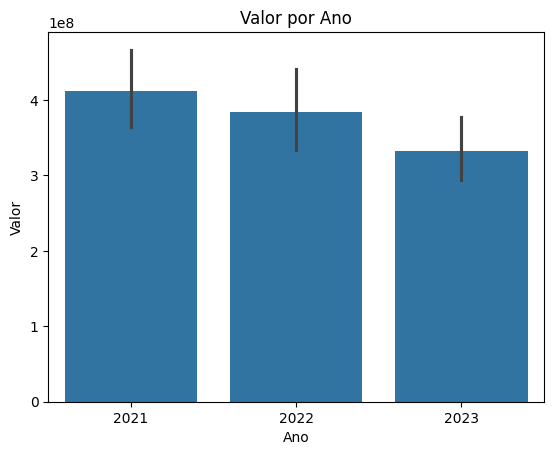

In [45]:
sns.barplot(x='Ano', y='Valor', data=df_exclui_negativos)
plt.title('Valor por Ano')
plt.show()

> Os gráficos de valor x UF e valor x Ano, são praticamente idênticos aos gráficos que levam os valores negativos em consideração. Por isso, acreditamos que a existência de valores negativos em 'valor' não afetará significamente nossa análise (nesse contexto)

## Fase 3: Gráficos de dispersão 

In [49]:
# filtrando apenas para as colunas com variaiveis numericas:
dataset_copiaNumerico = dataset_copia.select_dtypes(include=['number'])
df_exclui_negativos_numericos = df_exclui_negativos.select_dtypes(include=['number'])


In [50]:
dataset_copiaNumerico.corr()

,Ano,População,Valor
Ano,1.000000,0.083264,-0.021868
População,0.083264,1.000000,0.222472
Valor,-0.021868,0.222472,1.000000


In [23]:
df_exclui_negativos_numericos.corr() # Calcularemos a correlação excluindo os valores negativos

,Ano,População,Valor
Ano,1.000000,0.002847,-0.012904
População,0.002847,1.000000,0.250618
Valor,-0.012904,0.250618,1.000000


> A existência de valores negativos também não interferiu no cálculo da correlação

In [53]:

# Fazer uma cópia do dataset original
dataset_copiaNumerico_log= dataset_copiaNumerico.copy()

# Aplicar o logaritmo base 10 na coluna "População" e criar uma nova coluna "Log População"
dataset_copiaNumerico_log["Log População"] = np.log10(dataset_copiaNumerico_log["População"])

# Garantir que não há valores menores ou iguais a 0 na cópia para a coluna "Valor"
dataset_copiaNumerico_log = dataset_copiaNumerico_log[dataset_copiaNumerico_log["Valor"] > 0]

# Aplicar o logaritmo base 10 na coluna "Valor" e criar uma nova coluna "Log Valor"
dataset_copiaNumerico_log["Log Valor"] = np.log10(dataset_copiaNumerico_log["Valor"])


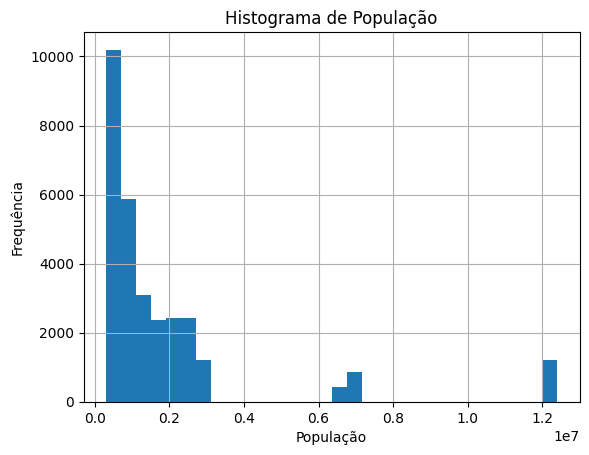

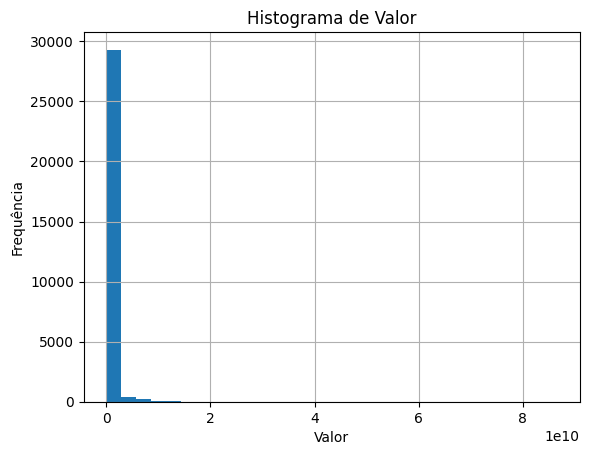

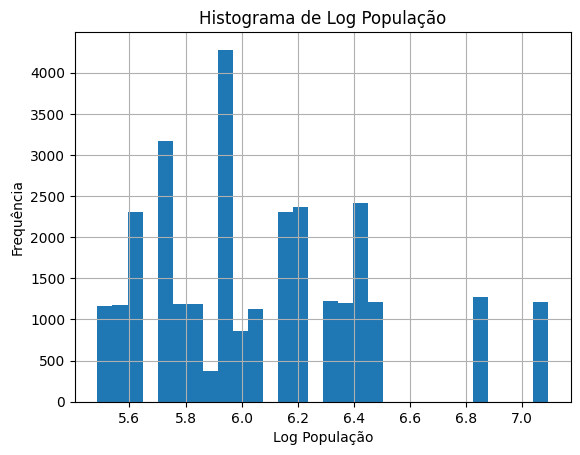

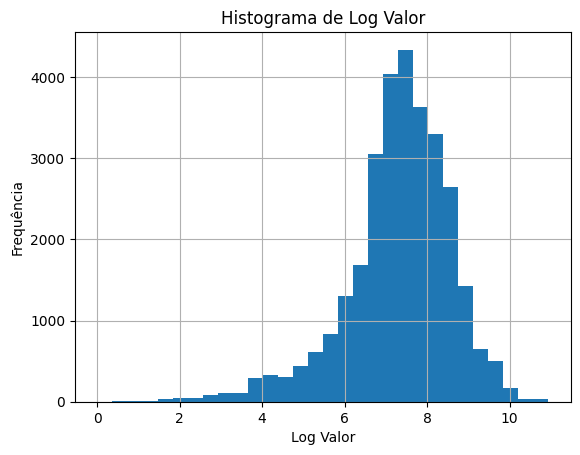

In [29]:
for coluna in dataset_copiaNumerico_log.columns:
    if coluna == "Ano":
        continue # Sem o histograma da coluna "ano", pois ja foi predefinido na escolha dos dados
    plt.figure()  
    dataset_copiaNumerico_log[coluna].hist(bins=30)  # Histograma da coluna atual
    plt.title(f'Histograma de {coluna}') 
    plt.xlabel(coluna) 
    plt.ylabel('Frequência') 
    plt.show()  # usei para exibir o histograma

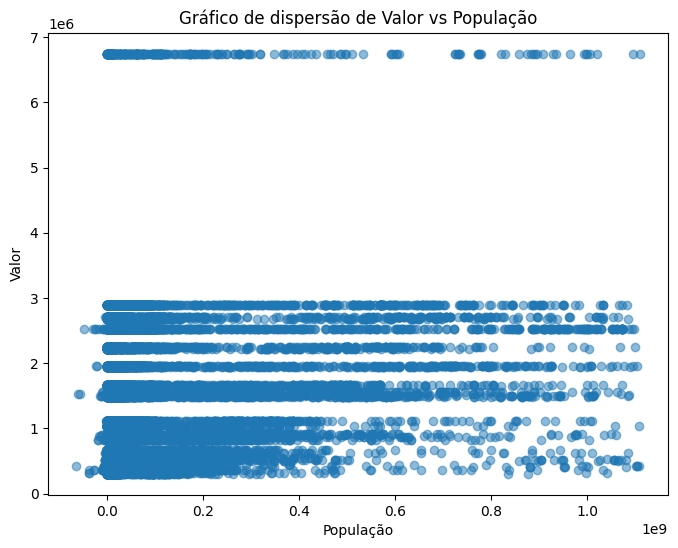

In [57]:
# Faremos um gráfico de dispersão com as duas colunas que possuem maior correlação, no caso "População" e "Valor"
plt.figure(figsize=(8, 6)) 
plt.scatter(dataset_copiaNumerico[coluna_x], dataset_copiaNumerico[coluna_y], alpha=0.5) 
plt.xlabel('População')
plt.ylabel('Valor')
plt.title(f'Gráfico de dispersão de Valor vs População')
plt.show()


> O que podemos concluir analisando o gráfico de dispersão?
>
> Observa-se que há uma grande concentração de pontos em valores baixos de população, sugerindo que a maioria das observações corresponde a regiões com uma população relativamente pequena. A maior parte dos valores de "Valor" também parece estarem proximo a valores menores, com um aumento gradual conforme a população aumenta.
>
>A medida que a população se aproxima de 1, o valor tende a aumentar, mas nao vemos uma relação linear entre esses valores;
>
>Os pontos do gráfico são densos em algumas áreas, o que pode indicar que existem muitos registros com valores semelhantes, especialmente em faixas de "Valor" mais baixas;

## Fase 4: K-means

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_copia[['População', 'Valor']])

kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset_scaled)
dataset_copia['labels'] = kmeans.labels_

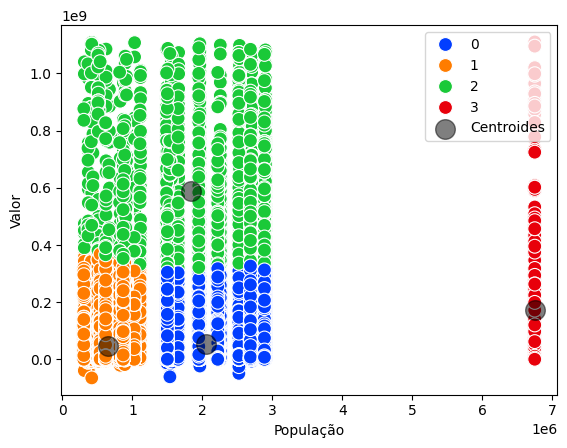

In [162]:
# Plotando o gráfico de dispersão clusterizado
sns.scatterplot(data=dataset_copia, x='População', y='Valor', hue=kmeans.labels_, palette='bright', s=100)
centroides = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5, label='Centroides') # mostraremos os centroides para visualizar melhor a media de cada clusters
plt.legend()

> Interpretando o gráfico, podemos tirar as seguintes conclusões: O cluster 3 (vermelho) parece estar mais concentrado em populações maiores, possivelmente indicando que esse grupo contém estados com grande população e valores associados. Já os Clusters 0, 1 e 2 parecem cobrir populações menores, mas têm uma variação nos valores (ainda que pequena).